In [9]:
import pickle
with open('data.pickle','rb') as f:
    train,test = pickle.load(f)
cnt = 0
for x in train:
    if x['is entity']=='1':
        cnt+=1
print(cnt,len(train))
cnt = 0
for x in test:
    if x['is entity']=='1':
        cnt+=1
print(cnt,len(test))



532 2330
51 259


In [6]:
import cv2

In [16]:
print('../../webpage-classification/'+train[0]['render'])
img = cv2.imread('../../webpage-classification/'+train[0]['render'])
print(img)

../../webpage-classification/./render/render1344.png
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]]


In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

for x in train:
    f = plt.imread('../../webpage-classification/'+x['render'])
    if f.shape[0]>f.shape[1]:
        f= f[0:f.shape[1],0:f.shape[1],:]
        #print(x['url'],f.shape)
    plt.imsave('./data/'+x['is entity']+'/'+x['render'],f)
        #plt.imshow(f)
        #plt.show()
        #cv2.imshow(f)
    #print(f.shape)

In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pathlib
#data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
#                                         fname='flower_photos', untar=True)
#data_dir = pathlib.Path(data_dir)

#image_count = len(list(data_dir.glob('*/*.jpg')))

#roses = list(data_dir.glob('roses/*'))

for image in train:
    #image_path = image['render']
    tag = image['is entity']
    if tag=='0':
        tag = "No"
    else:
        tag = "Yes"
    print(tag)
    img = Image.open('../../webpage-classification/'+image_path)
    print(image_path)
    #Image.save()
    #display.display(Image.open('../../webpage-classification/'+image_path['render']))
    #display.display(Image.open(str(image_path)))


No
./render/render1344.png
No
./render/render644.png
No
./render/render209.png


In [11]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
image_count = len(train)
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [ ]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

In [2]:
!pip install "tensorflow_hub>=0.6.0"
!pip install "tensorflow>=2.0.0"

import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/nnlm-en-dim128/2"
embed = hub.KerasLayer(module_url)
embeddings = embed(["A long sentence.", "single-word",
                  "http://example.com"])
print(embeddings.shape)  #(3,128)

     |████████████████████████████████| 92kB 2.6MB/s eta 0:00:011
     |████████████████████████████████| 421.8MB 41kB/s s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b8/83/755bd5324777875e9dff19c2e59daec837d0378c09196634524a3d7269ac/opt_einsum-3.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/40/

  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-cp35-none-any.whl size=63904 sha256=2a939d1ef410d9c4ab8c29ef98b2131269ec3e018cad7734248486ddc2ec37f4
  Stored in directory: /root/.cache/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Created wheel for gast: filename=gast-0.2.2-cp35-none-any.whl size=7636 sha256=e6b4de4a6197202d3d0048c82f3e00b28f4609e396c892c2e1b11417829e4aff
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for absl-py: filename=absl_py-0.9.0-cp35-none-any.whl size=119399 sha256=18eb18bcaa1d39aa8f6efeb5c1556a7ab94838cd83797d19ff151e607687dd18
  Stored in directory: /root/.cache/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Created wheel for termcolor: filename=termcolor-1.1.0-cp35-none-any.whl size=5680 sha256=795c6087f4e230fd897020b2ecb7c087d75ac9a5e50d0d666d447cc124f8f41d
  Stored in directory: /root/.cache/pip/wheels/7c/06/54/bc84598b

In [27]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}
from tensorflow.keras import layers

feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))
feature_extractor_layer.trainable = False

model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(2, activation='softmax')
])

In [30]:
list_ds = tf.data.Dataset.list_files(str('./data/*/*/*'))
for f in list_ds.take(5):
  print(f.numpy())

b'./data/0/render/render2440.png'
b'./data/0/render/render1334.png'
b'./data/0/render/render2021.png'
b'./data/0/render/render2319.png'
b'./data/0/render/render2318.png'


In [32]:
CLASS_NAMES = np.array(["0","1"])
CLASS_NAMES

array(['0', '1'], dtype='<U1')

In [33]:
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-3] == CLASS_NAMES

In [37]:
for f in list_ds.take(5):
  print(f.numpy(),get_label(f.numpy()))

b'./data/0/render/render2078.png' tf.Tensor([ True False], shape=(2,), dtype=bool)
b'./data/0/render/render2314.png' tf.Tensor([ True False], shape=(2,), dtype=bool)
b'./data/1/render/render302.png' tf.Tensor([False  True], shape=(2,), dtype=bool)
b'./data/1/render/render398.png' tf.Tensor([False  True], shape=(2,), dtype=bool)
b'./data/0/render/render322.png' tf.Tensor([ True False], shape=(2,), dtype=bool)


In [40]:
IMG_WIDTH, IMG_HEIGHT = 224,224
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [41]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)


Image shape:  (224, 224, 3)
Label:  [False  True]


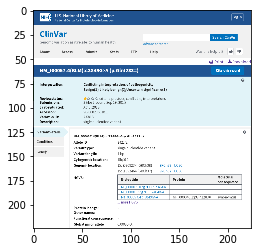

In [44]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())
  image_ = np.squeeze(image) # you can give axis attribute if you wanna squeeze in specific dimension
  plt.imshow(image_)
  plt.show()

In [49]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()
  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [50]:
train_ds = prepare_for_training(labeled_ds)


In [51]:
image_batch, label_batch = next(iter(train_ds))


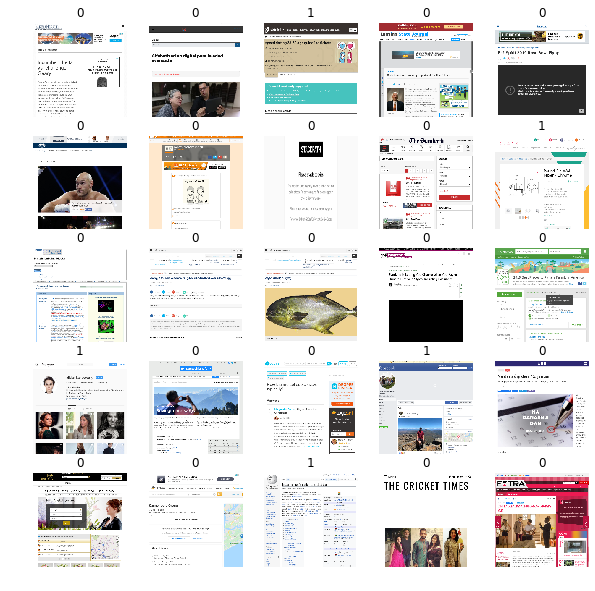

In [53]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
show_batch(image_batch.numpy(), label_batch.numpy())


In [58]:
for image_batch, label_batch in train_ds:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  predictions = model(image_batch)
  print(predictions.shape)

  break


Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 2)
(32, 2)


In [207]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc','f1_score'])

ValueError: Unknown metric function:f1_score

In [60]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

In [174]:

batch_stats_callback = CollectBatchStats()

history = model.fit_generator(train_ds, epochs=100,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              callbacks = [batch_stats_callback])

Train for 73.0 steps
Epoch 1/100
73/73 [==============================] - 14s 193ms/step - loss: 0.2765 - acc: 0.8750
Epoch 2/100
73/73 [==============================] - 14s 194ms/step - loss: 0.2745 - acc: 0.7812
Epoch 3/100
73/73 [==============================] - 14s 195ms/step - loss: 0.2677 - acc: 0.9062
Epoch 4/100
73/73 [==============================] - 14s 196ms/step - loss: 0.2573 - acc: 0.9688
Epoch 5/100
73/73 [==============================] - 14s 196ms/step - loss: 0.2559 - acc: 0.9375
Epoch 6/100
73/73 [==============================] - 14s 196ms/step - loss: 0.2545 - acc: 0.8438
Epoch 7/100
73/73 [==============================] - 14s 196ms/step - loss: 0.2465 - acc: 0.9062
Epoch 8/100
73/73 [==============================] - 14s 197ms/step - loss: 0.2430 - acc: 0.8438
Epoch 9/100
73/73 [==============================] - 14s 196ms/step - loss: 0.2422 - acc: 0.9375
Epoch 10/100
73/73 [==============================] - 14s 197ms/step - loss: 0.2394 - acc: 0.9375
Epoch 11

KeyError: 'loss'

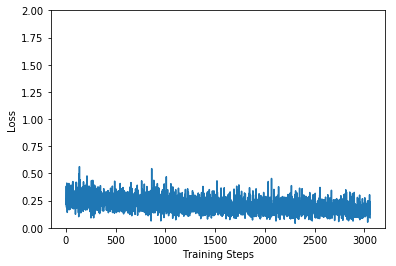

In [175]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

In [66]:
%matplotlib inline
from matplotlib import pyplot as plt

for x in test:
    f = plt.imread('../../webpage-classification/'+x['render'])
    if f.shape[0]>f.shape[1]:
        f= f[0:f.shape[1],0:f.shape[1],:]
        #print(x['url'],f.shape)
    plt.imsave('./test/'+x['is entity']+'/'+x['render'],f)
        #plt.imshow(f)
        #plt.show()
        #cv2.imshow(f)
    #print(f.shape)

In [161]:
test_ds = tf.data.Dataset.list_files(str('./test/*/*/*'))
for f in test_ds.take(5):
  print(f.numpy())
#test_img = test_ds.map(lambda x:decode_img(tf.io.read_file(x)))
test_data = test_ds.map(process_path, num_parallel_calls=AUTOTUNE)


b'./test/0/render/render541.png'
b'./test/0/render/render203.png'
b'./test/0/render/render618.png'
b'./test/0/render/render1424.png'
b'./test/0/render/render794.png'


In [162]:
for x,y in test_data:
    print((np.array([x])).shape)
    print(model.predict(np.array([x])))
    break

(1, 224, 224, 3)
[[0.9222585  0.07774148]]


In [163]:
test_np = np.array(list(test_data.as_numpy_iterator()))

In [164]:
testX = test_np[:,0]

In [165]:
testY = test_np[:,1]

In [166]:
print(testX.shape)
print(testY[1].shape)

(259,)
(2,)


In [167]:
testX = np.zeros(test_np[:,0].shape+test_np[0,0].shape)
testY = np.zeros(test_np[:,1].shape+test_np[0,1].shape)
for i in range(len(test_np[:,0])):
    testX[i,:] = test_np[i,0]
    testY[i,:] = test_np[i,1]

In [177]:
model.evaluate(testX,testY,batch_size=32)

259/259 [==============================] - 2s 6ms/sample - loss: 0.3665 - acc: 0.8610


[0.36650817826908066, 0.8610039]

In [176]:
model.predict(testX[:5])

array([[9.8455310e-01, 1.5446901e-02],
       [9.9448276e-01, 5.5172537e-03],
       [1.0000000e+00, 5.7336722e-09],
       [3.8886994e-01, 6.1113006e-01],
       [3.0728716e-01, 6.9271278e-01]], dtype=float32)

In [170]:
len(test)

259

In [171]:
len(train)

2330

In [179]:
!pip install "tensorflow_addons"
import tensorflow_addons as tfa

f1 = tfa.metrics.F1Score(num_classes=2, average=None)


     |████████████████████████████████| 993kB 2.7MB/s eta 0:00:01


In [182]:
Ypred = model.predict(testX)

f1.update_state(Ypred, testY)


array([0.43601773, 0.28577415])

In [197]:
recall = 0
pre = 0
cnt = 0
for i in range(len(Ypred)):
    if Ypred[i,0]>Ypred[i,1] and testY[i,0]>testY[i,1]:
        cnt+=1
    if testY[i,0]>testY[i,1]:
        recall+=1
    if Ypred[i,0]>Ypred[i,1]:
        pre+=1
pre =cnt / pre
recall = cnt/recall

In [198]:
print(pre,recall)
print(2*pre*recall/(pre+recall))

0.9343434343434344 0.8894230769230769
0.9113300492610836


ImportError: No module named 'keras'